In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import librosa
audio_data = '/content/drive/My Drive/wavdataset/pop/pop.00000.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [4]:
librosa.load(audio_data, sr=44100)

(array([-0.08693509, -0.1039058 , -0.09691031, ...,  0.02878346,
         0.01786033,  0.01615444], dtype=float32), 44100)

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

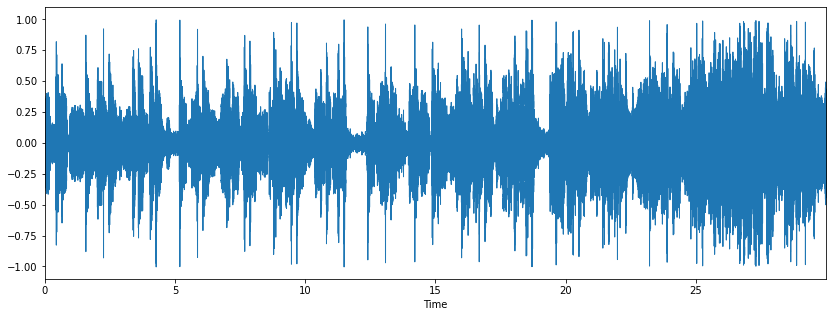

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

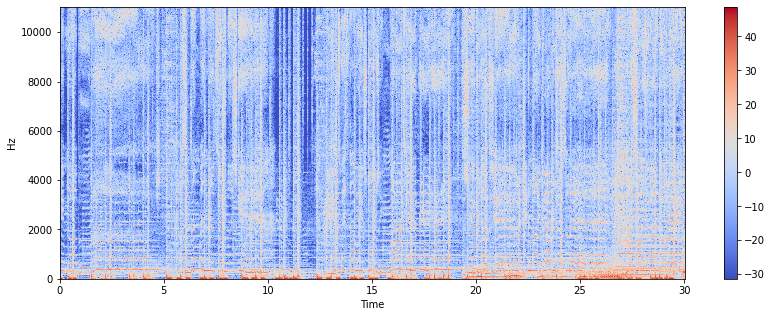

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

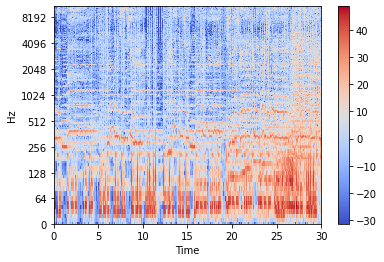

In [8]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [9]:
librosa.output.write_wav('example.wav', x, sr)

In [10]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

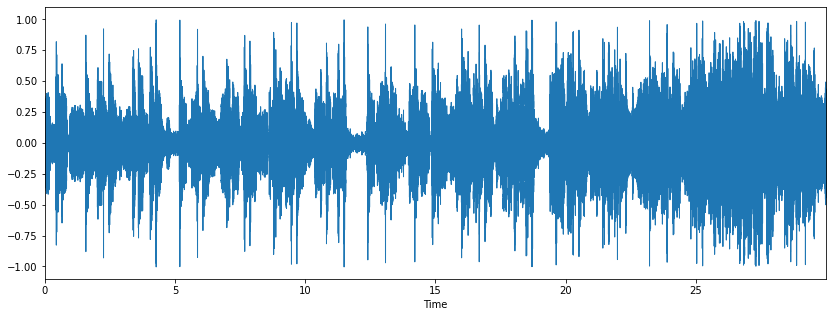

In [11]:
# Load the signal
x, sr = librosa.load('/content/drive/My Drive/wavdataset/pop/pop.00000.wav')

#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

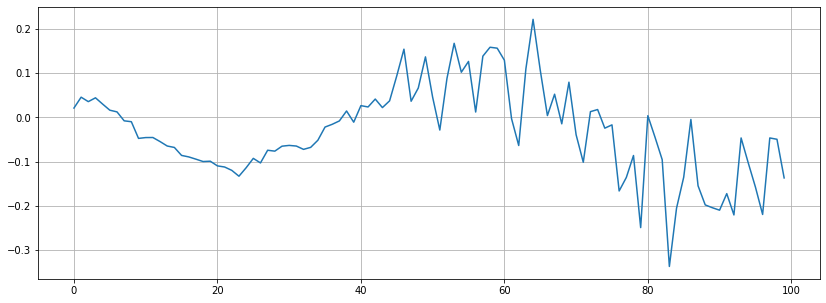

In [12]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))

plt.plot(x[n0:n1])
plt.grid()

In [13]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

15


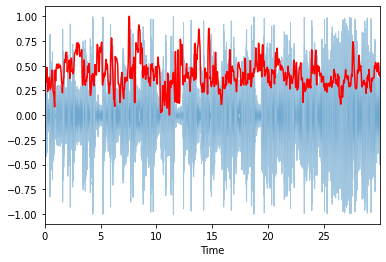

In [14]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
from sklearn.preprocessing import MinMaxScaler
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

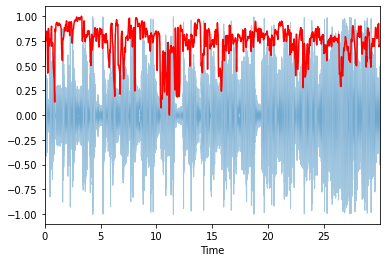

In [15]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

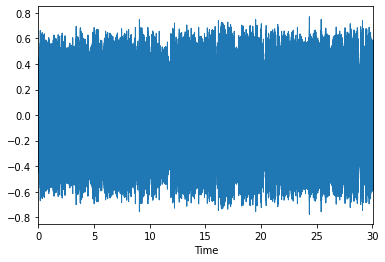

In [16]:
x, fs = librosa.load('/content/drive/My Drive/wavdataset/country/country.00000.wav')
librosa.display.waveplot(x, sr=sr)

(20, 1296)


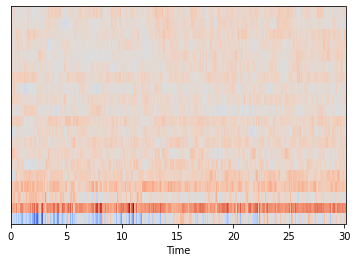

In [17]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print (mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 4.38606627e-17  2.96059473e-16 -2.19303314e-17 -4.22158878e-16
  0.00000000e+00 -3.28954970e-17 -6.03084112e-17  0.00000000e+00
  6.57909941e-17  3.56367884e-17 -2.19303314e-17 -5.75671198e-17
  0.00000000e+00  2.19303314e-17 -2.19303314e-17 -4.38606627e-17
 -2.19303314e-17  8.77213254e-17  0.00000000e+00 -2.19303314e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


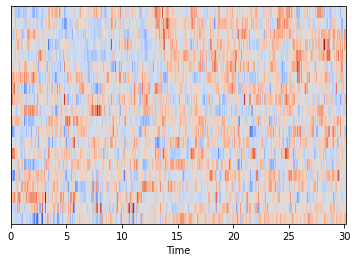

In [18]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

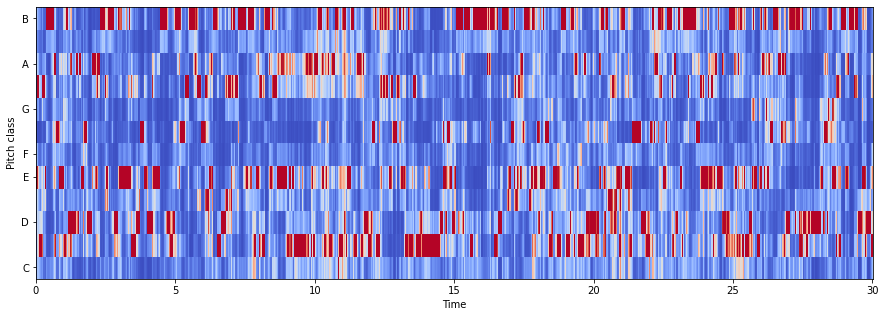

In [19]:
# Loadign the file
x, sr = librosa.load('/content/drive/My Drive/wavdataset/classical/classical.00002.wav')
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [20]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
import pickle

# Preprocessing
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [21]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./drive/My Drive/wavdataset/{g}'):
        songname = f'./drive/My Drive/wavdataset//{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [22]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file = open('/content/drive/My Drive/musicdata.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./drive/My Drive/wavdataset/{g}'):
        songname = f'./drive/My Drive/wavdataset/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rmse(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('/content/drive/My Drive/musicdata.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving musicdata.csv to musicdata (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['musicdata.csv']))

data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843071,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783624,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [ ]:
#Encoding the labels
encoder = LabelEncoder()
genre_list =data.iloc[:, -1]
y = encoder.fit_transform(genre_list)
data = data.drop(['filename'],axis=1)

In [ ]:
#Scaling the feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
print (X.shape)

(1000, 26)


In [ ]:
# split the data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_val = X_train[:100]
X_train = X_train[100:]
y_val = y_train[:100]
y_train = y_train[100:]

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(700, 26) (700,) (200, 26) (200,) (100, 26) (100,)


In [ ]:
len(y_train)

700

In [ ]:
len(y_test)

200

In [ ]:
len(y_val)

100

In [ ]:
# import KNeighborsClassifier model 
from sklearn.neighbors import KNeighborsClassifier as KNN 
knn = KNN(n_neighbors = 3) 
  
# train model 
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#build the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation= 'relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation= 'relu'))
model.add(keras.layers.Dense(64, activation= 'relu'))
model.add(keras.layers.Dense(10, activation= 'softmax'))

#compile over adam optimizer
model.compile(optimizer='adam', 
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

#train
model_history_adam = model.fit(X_train,
                               y_train,
                               epochs= 200,
                               batch_size=256,
                               validation_data=(X_val, y_val) )

Train on 700 samples, validate on 100 samples
Epoch 1/200
700/700 [==============================] - 0s 200us/step - loss: 2.2777 - acc: 0.1600 - val_loss: 2.1902 - val_acc: 0.2200
Epoch 2/200
700/700 [==============================] - 0s 27us/step - loss: 2.0999 - acc: 0.2971 - val_loss: 2.0801 - val_acc: 0.3100
Epoch 3/200
700/700 [==============================] - 0s 26us/step - loss: 1.9652 - acc: 0.3900 - val_loss: 1.9725 - val_acc: 0.3200
Epoch 4/200
700/700 [==============================] - 0s 29us/step - loss: 1.8385 - acc: 0.3886 - val_loss: 1.8632 - val_acc: 0.3300
Epoch 5/200
700/700 [==============================] - 0s 24us/step - loss: 1.7184 - acc: 0.4057 - val_loss: 1.7517 - val_acc: 0.3200
Epoch 6/200
700/700 [==============================] - 0s 23us/step - loss: 1.6152 - acc: 0.4571 - val_loss: 1.6544 - val_acc: 0.3800
Epoch 7/200
700/700 [==============================] - 0s 24us/step - loss: 1.5197 - acc: 0.4843 - val_loss: 1.5561 - val_acc: 0.4200
Epoch 8/200
700

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               6912      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 48,714
Trainable params: 48,714
Non-trainable params: 0
_________________________________________________________________


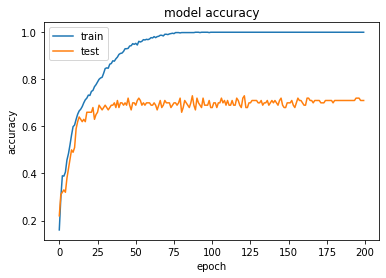

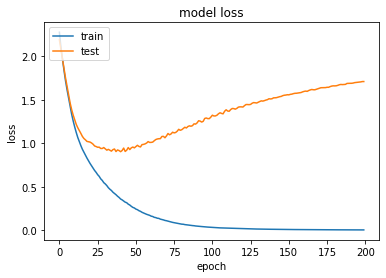

In [ ]:
plt.plot(model_history_adam.history['acc'])
plt.plot(model_history_adam.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(model_history_adam.history['loss'])
plt.plot(model_history_adam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile over adagrad optimizer
model.compile(optimizer='adagrad', 
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

#train
model_history_adagrad = model.fit(X_train,
                               y_train,
                               epochs= 200,
                               batch_size=256,
                               validation_data=(X_val, y_val), verbose= False)

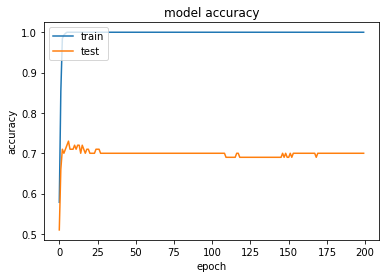

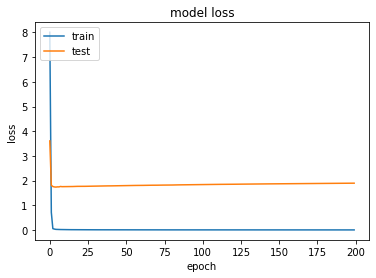

In [ ]:
plt.plot(model_history_adagrad.history['acc'])
plt.plot(model_history_adagrad.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(model_history_adagrad.history['loss'])
plt.plot(model_history_adagrad.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile over sgd optimizer
model.compile(optimizer='sgd', 
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

#train
model_history_sgd = model.fit(X_train,
                               y_train,
                               epochs= 100,
                               batch_size=256,
                               validation_data=(X_val, y_val), verbose=False)

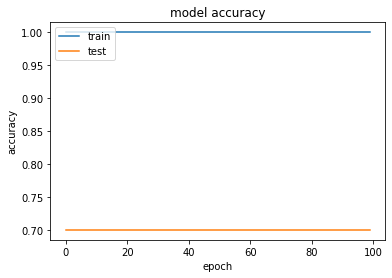

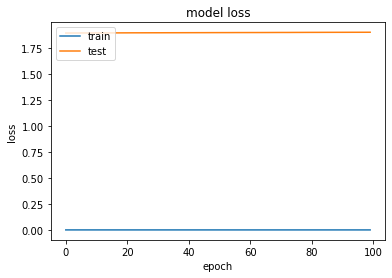

In [ ]:
plt.plot(model_history_sgd.history['acc'])
plt.plot(model_history_sgd.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(model_history_sgd.history['loss'])
plt.plot(model_history_sgd.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile over nadam optimizer
model.compile(optimizer='nadam', 
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

#train
model_history_nadam = model.fit(X_train,
                               y_train,
                               epochs= 100,
                               batch_size=256,
                               validation_data=(X_val, y_val), verbose=False)

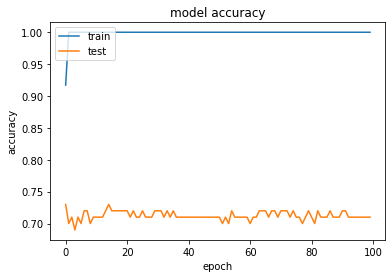

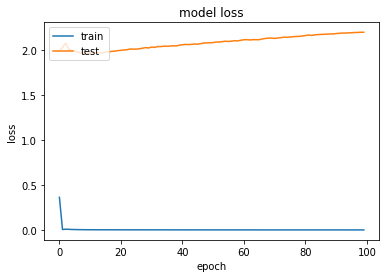

In [ ]:
plt.plot(model_history_nadam.history['acc'])
plt.plot(model_history_nadam.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(model_history_nadam.history['loss'])
plt.plot(model_history_nadam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile over rmsprop optimizer
model.compile(optimizer='rmsprop', 
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

#train
model_history_rmsprop = model.fit(X_train,
                               y_train,
                               epochs= 100,
                               batch_size=256,
                               validation_data=(X_val, y_val), verbose=False)

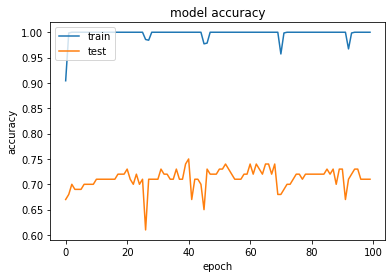

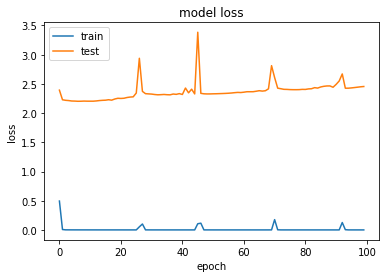

In [ ]:
plt.plot(model_history_rmsprop.history['acc'])
plt.plot(model_history_rmsprop.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(model_history_rmsprop.history['loss'])
plt.plot(model_history_rmsprop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#compile over adadelta optimizer
model.compile(optimizer='adadelta', 
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

#train
model_history_adadelta = model.fit(X_train,
                               y_train,
                               epochs= 100,
                               batch_size=256,
                               validation_data=(X_val, y_val), verbose=False)

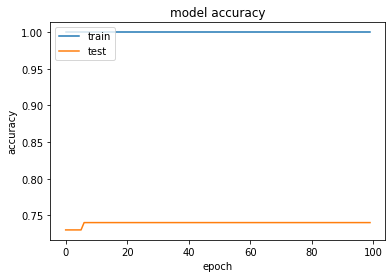

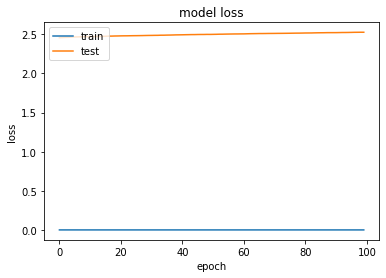

In [ ]:
plt.plot(model_history_adadelta.history['acc'])
plt.plot(model_history_adadelta.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(model_history_adadelta.history['loss'])
plt.plot(model_history_adadelta.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# train over various optimizers..

def train_model_op(model, X_train, y_train, X_val, y_val, optim='adam'):
  #compile
  model.compile(optimizer=optim,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  #train
  model_history =model.fit(X_train,
                           y_train,
                           epochs=100,
                           batch_size=256,
                           validation_data=(X_val, y_val))
  return model_history


#assuming the model is defined earlier
  model_history_adagrad = train_model_op(model, X_train, y_train, X_val, y_val, 'adagrad'),
  model_history_sgd = train_model_op(model, X_train, y_train, X_val, y_val, 'sgd'),
  model_history_nadam = train_model_op(model, X_train, y_train, X_val, y_val, 'nadam'),
  model_history_rmsprop = train_model_op(model, X_train, y_train, X_val, y_val, 'rmsprop'),
  model_history_adadelta = train_model_op(model, X_train, y_train, X_val, y_val, 'adadelta')
  
                

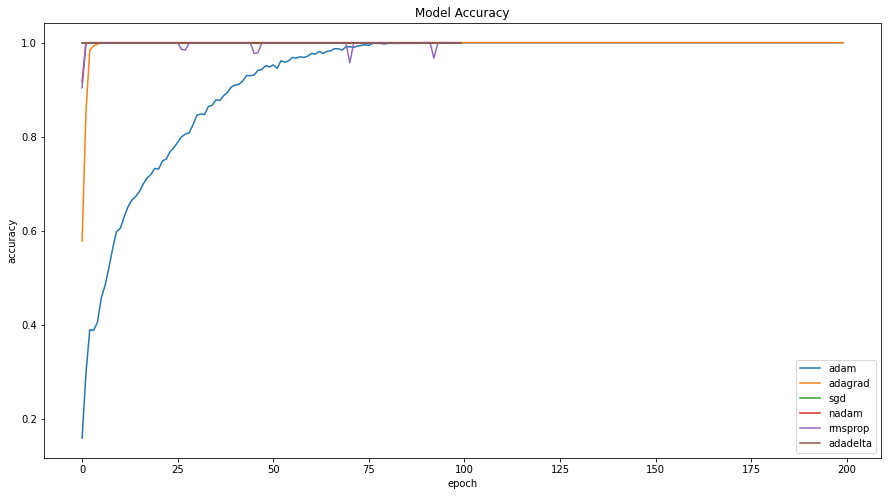

In [ ]:
#summarize history for accuracy
plt.figure(figsize=(15, 8))
plt.plot(model_history_adam.history['acc']),
plt.plot(model_history_adagrad.history['acc']),
plt.plot(model_history_sgd.history['acc']),
plt.plot(model_history_nadam.history['acc']),
plt.plot(model_history_rmsprop.history['acc']),
plt.plot(model_history_adadelta.history['acc'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['adam', 'adagrad', 'sgd','nadam','rmsprop','adadelta'], loc='best')
plt.show()

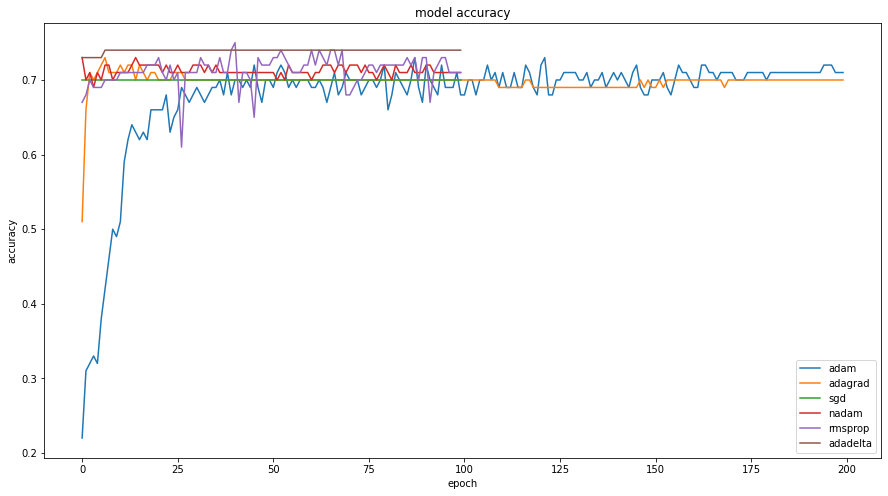

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15, 8))
plt.plot(model_history_adam.history['val_acc'])
plt.plot(model_history_adagrad.history['val_acc'])
plt.plot(model_history_sgd.history['val_acc'])
plt.plot(model_history_nadam.history['val_acc'])
plt.plot(model_history_rmsprop.history['val_acc'])
plt.plot(model_history_adadelta.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['adam','adagrad','sgd','nadam','rmsprop','adadelta'])
plt.show()

In [ ]:
#save the model and downlaod
model.save('model.h5')
files.download('model.h5')

In [ ]:
 test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc: ', test_acc, '\ntest_loss: ', test_loss)

200/200 [==============================] - 0s 74us/step
test_acc:  0.6100000143051147 
test_loss:  3.558744201660156


In [ ]:
#loading a saved model in drive
from google.colab import files
uploaded = files.upload()

Saving model.h5 to model (1).h5


In [ ]:
stfmodel = keras.models.load_model('model.h5')
stfmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               6912      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 48,714
Trainable params: 48,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 stftest_loss, stftest_acc = stfmodel.evaluate(X_test, y_test)
 print('test_acc:', stftest_acc, '\ntest_loss:' , stftest_loss)

200/200 [==============================] - 0s 140us/step
test_acc: 0.6100000143051147 
test_loss: 3.558744201660156
